In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans

In [3]:
# Load the dataset
df = pd.read_csv(r"C:/Users/91830/Documents/AccidentsBig.csv", low_memory=False)

# Check the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())


   Accident_Index  longitude   latitude  Police_Force  Accident_Severity  \
0             1.0  78.610393  14.724026           1.0                2.0   
1             2.0  78.534042  14.762353           1.0                3.0   
2             3.0  78.470877  14.745606           1.0                3.0   
3             4.0  78.557994  14.667128           1.0                3.0   
4             5.0  78.576431  14.703443           1.0                3.0   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week   Time  \
0                 1.0                   1.0          3.0  17:42   
1                 1.0                   1.0          4.0  17:36   
2                 2.0                   1.0          5.0  00:15   
3                 1.0                   1.0          6.0  10:35   
4                 1.0                   1.0          2.0  21:13   

   Local_Authority_(District)  ... Pedestrian_Crossing-Physical_Facilities  \
0                        12.0  ...                            

In [5]:
# Drop rows with missing data
df.dropna(inplace=True)

# Alternatively, you can fill missing values with mean or median (if appropriate)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)


In [7]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract day of week and month
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month


In [9]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
df['Police_Force'] = label_encoder.fit_transform(df['Police_Force'])
df['Weather_Conditions'] = label_encoder.fit_transform(df['Weather_Conditions'])
# Repeat for other categorical columns as needed


In [29]:
scaler = StandardScaler()
df[['longitude', 'latitude', 'Number_of_Vehicles', 'Speed_limit']] = scaler.fit_transform(
    df[['longitude', 'latitude', 'Number_of_Vehicles', 'Speed_limit']])


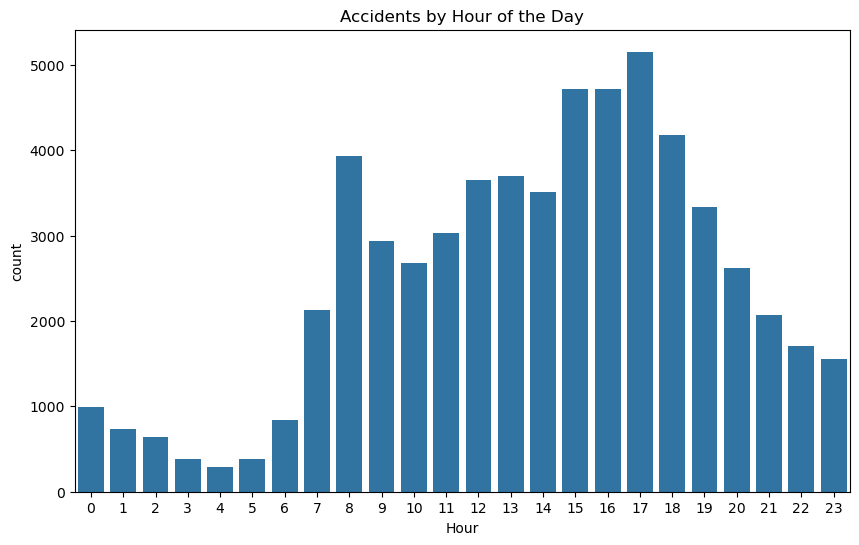

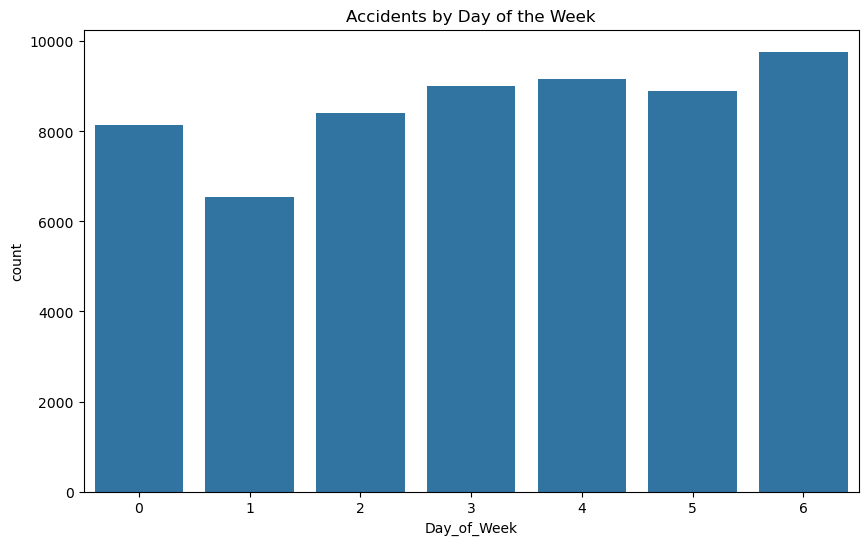

In [13]:
# Plot accidents by time of day (hour)
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of the Day')
plt.show()

# Plot accidents by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='Day_of_Week', data=df)
plt.title('Accidents by Day of the Week')
plt.show()


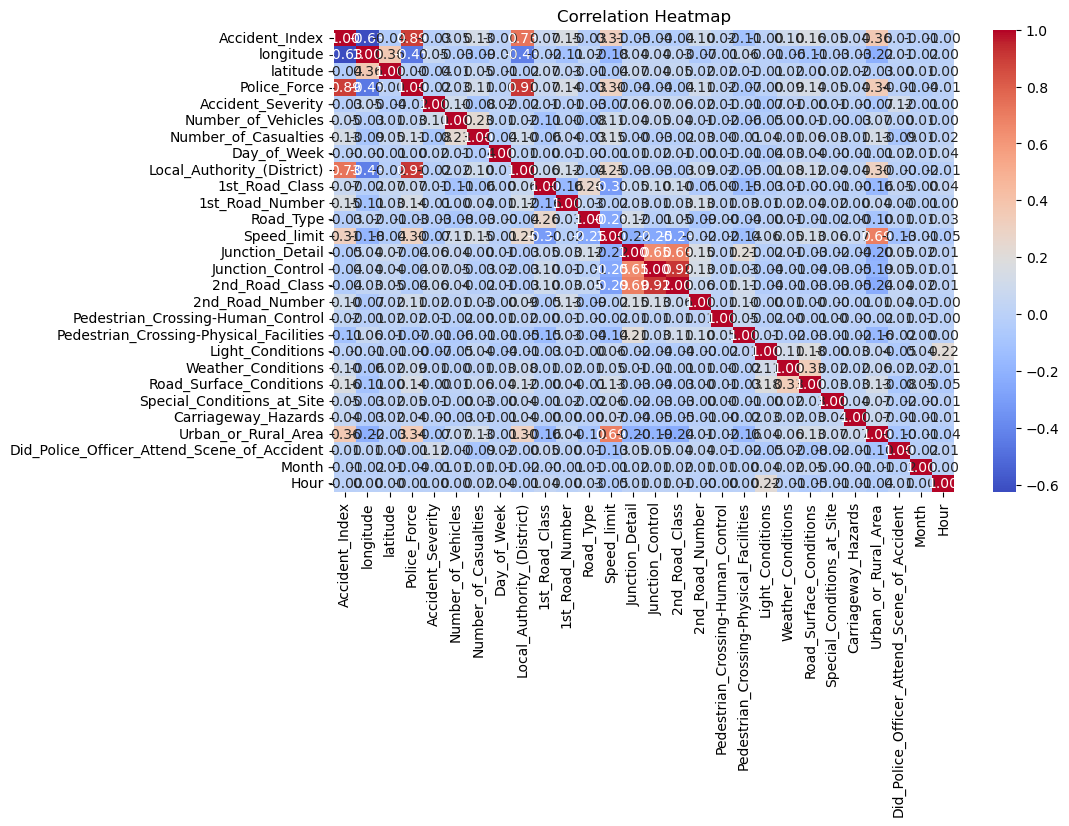

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Check if any numeric columns exist
if not df_numeric.empty:
    # Plot the heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns found in the dataset.")


In [17]:
df['Accident_Severity_Label'] = df['Accident_Severity'].apply(lambda x: 'Severe' if x > 2 else 'Minor')


In [37]:
# Select features and target
X = df[['longitude', 'latitude', 'Number_of_Vehicles', 'Speed_limit', 'Day_of_Week', 'Weather_Conditions']]
y = df['Accident_Severity_Label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       Minor       0.28      0.07      0.11      1597
      Severe       0.87      0.97      0.92     10383

    accuracy                           0.85     11980
   macro avg       0.58      0.52      0.52     11980
weighted avg       0.79      0.85      0.81     11980

Accuracy: 0.8524207011686143


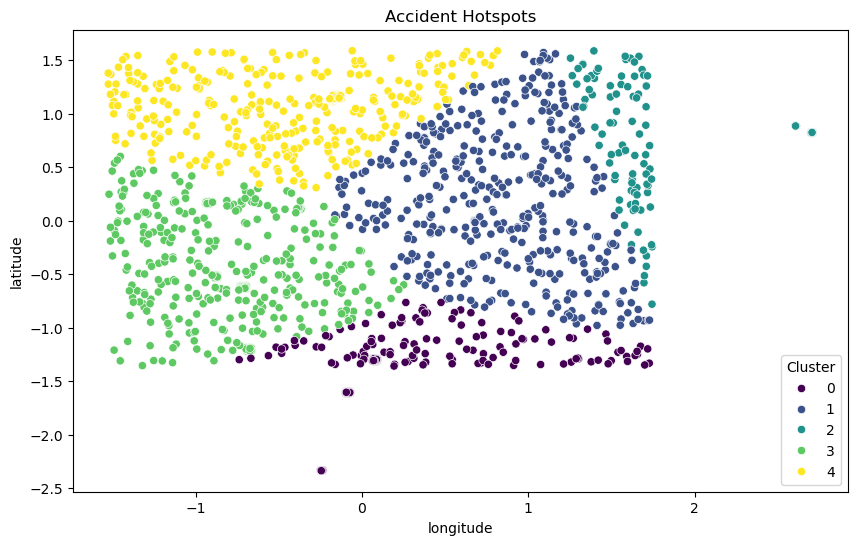

In [41]:
# Select features for clustering (Longitude and Latitude)
X_cluster = df[['longitude', 'latitude']]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Change number of clusters as needed
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', palette='viridis', data=df)
plt.title('Accident Hotspots')
plt.show()
